In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats

In [2]:
SBCR_RESULTS = "data/results_evaluate_seed-3022024.xlsx"

selected_chunks_path = "data/chunk_ids_list.csv"
DATASET_COMPLETE = "data/dataset.json"
DATASET_METADATA = "data/dataset_details"

## Loading data from Dataset

In [3]:
df_complete = pd.read_json(DATASET_COMPLETE)
df_complete

,chunk_id,v1,v2,base,solution,before_context,after_context
0,776662,if (response.getResponseCode() == 200 ...,if (response.getResponseCode() == ...,package net.threescale.api.v2;\n\nimport net.t...,"\n log.info(""response code was: "" +...","\n log.info(""response code was: "" +...",}\n }\n\n\n
1,776782,this.outgoingOrdinals = createOrdinals( so...,this.sourceProcessID = sourceProcess.getID...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",public ProcessEdge( ElementGraph sourceEleme...,\n public ProcessEdge( ElementGraph sourceEle...,}\n\n private Set<Integer> createOrdinals...
2,776793,this.ordinals = processEdge.getIncomingO...,this.ordinals = processEdge.getSourcePro...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",{\n this.config = config;\n th...,{\n this.config = config;\n th...,}\n\n public FlowElement getFlowEleme...
3,776828,flowStepStats.markFailed( throwable ...,flowStepStats.markFailed( this.throw...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",\n if( this.throwable != null )\n ...,\n if( this.throwable != null )\n ...,}\n else\n {\n\n
4,776863,"public Map<Object, Object> getDefaultPropert...",{\n Update.registerPlanner( getClass() );\n...,"/*\n * Copyright (c) 2007-2014 Concurrent, Inc...",return DebugLevel.valueOf( debugLevel );\n...,return DebugLevel.valueOf( debugLevel );\n...,{\n return defaultProperties;\n }\n\n
...,...,...,...,...,...,...,...
13568,1658666,"\tpublic static String file = ""config.xml"";\n\...","\tpublic static final String file = ""config.xm...",package com.rom.server.configuration;\n\nimpor...,* @author mweidele\n */\npublic class Config ...,* @author mweidele\n */\npublic class Config ...,\tprivate Integer serverPort = null;\n\t\n\t@O...
13569,1658014,if (!TextUtils.isEmpty(localSy...,if (!TextUtils.isEmpty(localSyncID...,/*\n * Copyright (C) 2006 The Android Open Sou...,localSyncVersion = null;\n...,localSyncVersion = null;\n...,}\n ...
13570,1658028,if (DebugFlags.LOAD_LISTENER) {\n ...,if (WebView.LOGV_ENABLED) {\n ...,/*\n * Copyright (C) 2006 The Android Open Sou...,*/\n private String guessMimeTypeFromE...,*/\n private String guessMimeTypeFromE...,}\n\n /**\n\n
13571,1658029,,private boolean mIsScanModeSetDueToAHidden...,/*\n * Copyright (C) 2008 The Android Open Sou...,private SettingsObserver mSettingsObserver...,private SettingsObserver mSettingsObserver...,\n // Wi-Fi run states:\n private static...


In [4]:
df_collected = pd.read_csv('results_experiment_similarity_thousand.csv')[['chunk_id']]
df_complete = df_complete[df_complete['chunk_id'].isin(df_collected['chunk_id'].unique())]
df_complete

,chunk_id,v1,v2,base,solution,before_context,after_context
0,776662,if (response.getResponseCode() == 200 ...,if (response.getResponseCode() == ...,package net.threescale.api.v2;\n\nimport net.t...,"\n log.info(""response code was: "" +...","\n log.info(""response code was: "" +...",}\n }\n\n\n
1,776782,this.outgoingOrdinals = createOrdinals( so...,this.sourceProcessID = sourceProcess.getID...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",public ProcessEdge( ElementGraph sourceEleme...,\n public ProcessEdge( ElementGraph sourceEle...,}\n\n private Set<Integer> createOrdinals...
2,776793,this.ordinals = processEdge.getIncomingO...,this.ordinals = processEdge.getSourcePro...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",{\n this.config = config;\n th...,{\n this.config = config;\n th...,}\n\n public FlowElement getFlowEleme...
3,776828,flowStepStats.markFailed( throwable ...,flowStepStats.markFailed( this.throw...,"/*\n * Copyright (c) 2007-2015 Concurrent, Inc...",\n if( this.throwable != null )\n ...,\n if( this.throwable != null )\n ...,}\n else\n {\n\n
4,776863,"public Map<Object, Object> getDefaultPropert...",{\n Update.registerPlanner( getClass() );\n...,"/*\n * Copyright (c) 2007-2014 Concurrent, Inc...",return DebugLevel.valueOf( debugLevel );\n...,return DebugLevel.valueOf( debugLevel );\n...,{\n return defaultProperties;\n }\n\n
...,...,...,...,...,...,...,...
13567,1658665,"\tpublic static String file = ""config.xml"";\n\...","\tpublic static final String file = ""config.xm...",package com.rom.server.configuration;\n\nimpor...,* @author mweidele\n */\npublic class Config ...,* @author mweidele\n */\npublic class Config ...,\tprivate Integer serverPort = null;\n\t\n\t@O...
13568,1658666,"\tpublic static String file = ""config.xml"";\n\...","\tpublic static final String file = ""config.xm...",package com.rom.server.configuration;\n\nimpor...,* @author mweidele\n */\npublic class Config ...,* @author mweidele\n */\npublic class Config ...,\tprivate Integer serverPort = null;\n\t\n\t@O...
13570,1658028,if (DebugFlags.LOAD_LISTENER) {\n ...,if (WebView.LOGV_ENABLED) {\n ...,/*\n * Copyright (C) 2006 The Android Open Sou...,*/\n private String guessMimeTypeFromE...,*/\n private String guessMimeTypeFromE...,}\n\n /**\n\n
13571,1658029,,private boolean mIsScanModeSetDueToAHidden...,/*\n * Copyright (C) 2008 The Android Open Sou...,private SettingsObserver mSettingsObserver...,private SettingsObserver mSettingsObserver...,\n // Wi-Fi run states:\n private static...


In [5]:
tuning_chunks = pd.read_excel('data/results_tunning_seed-3022024.xlsx')['chunk_id'].unique()
tuning_chunks

array([ 945002,  790977,  839529, 1282702,  982002, 1189169,  962729,
       1154299, 1251059, 1175439, 1132328, 1058936, 1371148, 1010181,
        783558, 1113856,  800035, 1399454, 1020456, 1182525, 1069736,
       1042257, 1655381, 1156719,  937640, 1237123,  962379, 1389780,
        964998, 1151715, 1416237,  982801,  934465,  963736,  938918,
       1017758,  973452, 1406313, 1189903, 1127847,  797472, 1015166,
       1507397, 1145276,  933349, 1104725, 1120972,  977121, 1389376,
       1044845, 1403758,  960891,  938534,  782069,  970254, 1176273,
        997401, 1132120, 1236055, 1417098, 1310797,  797700,  929370,
       1099605,  932952, 1394034, 1218991,  926954,  777808,  963422,
        825711, 1095324, 1159191, 1107629, 1312568, 1315237,  937657,
       1387283,  983528,  976998,  777871,  962506,  937644,  921383,
       1132575, 1102892,  932296,  976498,  929723, 1102915, 1655811,
        784025, 1400089, 1093947, 1516191, 1399779, 1114453, 1460571,
       1130958, 1130

In [6]:
df_evaluation = pd.read_excel(SBCR_RESULTS)
df_evaluation = df_evaluation.rename(columns={"solution_sim_lcs": "sim_sbcr", "time_seconds": "time_sbcr", "fitness": "fitness_sbcr"})
df_evaluation = df_evaluation[~df_evaluation['chunk_id'].isin(tuning_chunks)]
df_evaluation.sort_values('chunk_id')

,chunk_id,fitness_sbcr,sim_sbcr,status,time_sbcr
548,776942,0.738426,1.000000,ok,1.489457
304,777222,0.890922,0.995192,ok,0.841280
186,777715,0.776531,0.985915,ok,0.333870
585,777972,0.739558,0.918239,ok,2.215153
257,777981,0.493671,1.000000,ok,1.991492
...,...,...,...,...,...
468,1653719,0.702732,1.000000,ok,1.030614
140,1653901,0.492901,0.192205,ok,6.408932
296,1656072,0.498986,0.810680,ok,12.752023
530,1656401,0.901249,0.788274,ok,0.941998


In [7]:
print(df_evaluation['sim_sbcr'].isnull().sum()) 
df_results_clean = df_evaluation.dropna(subset=['sim_sbcr'])

0


In [8]:
print(df_results_clean[['sim_sbcr', 'time_sbcr']].describe())

         sim_sbcr   time_sbcr
count  628.000000  628.000000
mean     0.809004    4.786695
std      0.200003    4.913480
min      0.075646    0.100592
25%      0.687125    0.692114
50%      0.865125    2.556238
75%      1.000000   10.520015
max      1.000000   45.932123


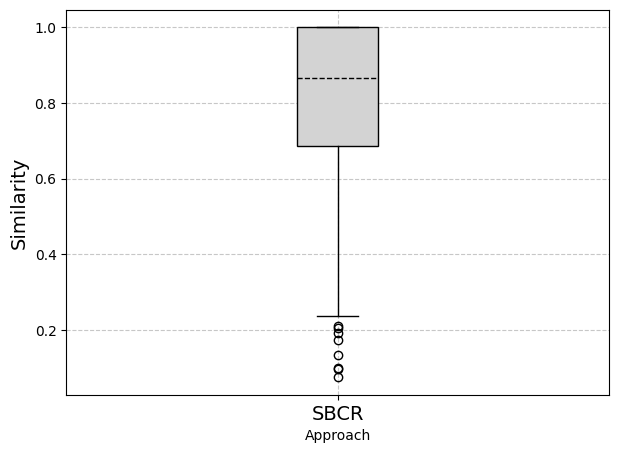

In [9]:
plt.figure(figsize=(7, 5)) 
plt.boxplot([df_results_clean['sim_sbcr']], 
            patch_artist=True, 
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  
            boxprops=dict(facecolor='lightgray', color='black'),  
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),  
            showfliers=True)

plt.xlabel('Approach')
plt.ylabel('Similarity', fontsize=14)
plt.xticks([1], ['SBCR'], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('figures/SBCR_boxplot_similarity.png', dpi=300) 
plt.show()  

In [10]:
column = 'sim_sbcr'
#IQR = Q3 - Q1
q1 = df_results_clean[column].quantile(.25)
q3 = df_results_clean[column].quantile(.75)
iqr = q3 - q1 
lower_whiskers = q1 - 1.5 * iqr
upper_whiskers = q3 + 1.5 * iqr
print(lower_whiskers)
print(upper_whiskers)

0.21781287485005985
1.469312275089964


In [11]:
print(len(df_results_clean[df_results_clean[column]<lower_whiskers])/len(df_results_clean))
print(len(df_results_clean[df_results_clean['sim_sbcr']==1])/len(df_results_clean))

0.012738853503184714
0.2515923566878981


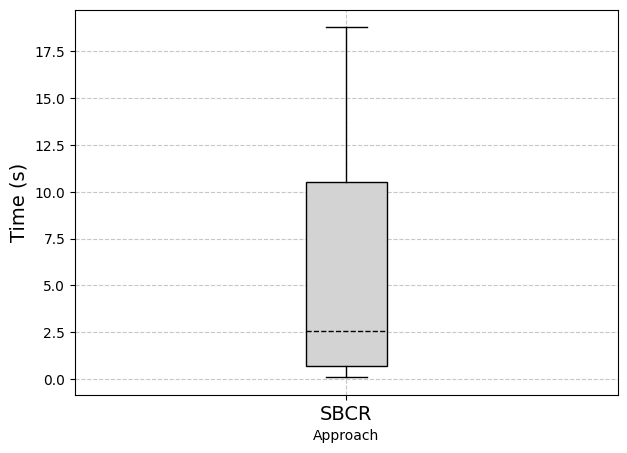

In [12]:
plt.figure(figsize=(7, 5)) 
plt.boxplot([df_results_clean['time_sbcr']], 
            patch_artist=True, 
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  
            boxprops=dict(facecolor='lightgray', color='black'),  
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),  
            showfliers=False)

plt.xlabel('Approach')
plt.ylabel('Time (s)', fontsize=14)
plt.xticks([1], ['SBCR'], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('figures/SBCR_boxplot_time.png', dpi=300) 
plt.show()  

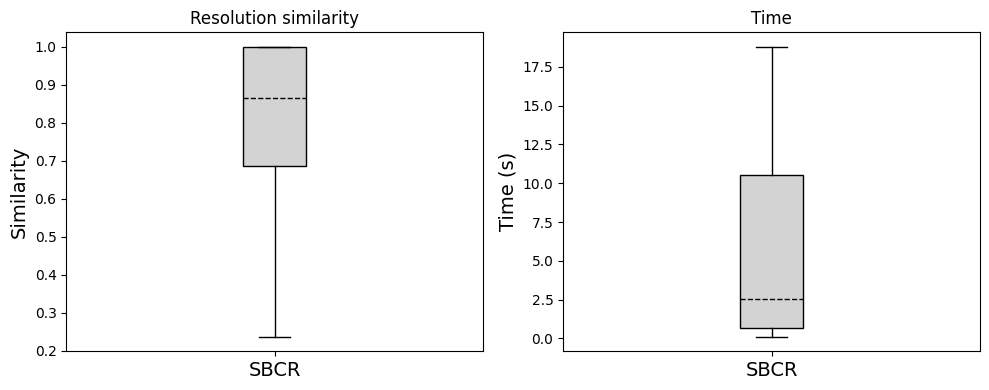

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].boxplot([df_results_clean['sim_sbcr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[0].set_title(f"Resolution similarity")
axs[0].set_ylabel('Similarity', fontsize=14)
# axs[0].set_xlabel('Approach', fontsize=14)
axs[0].set_xticks([1], ['SBCR'], fontsize=14)


axs[1].boxplot([df_results_clean['time_sbcr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[1].set_title(f"Time")
axs[1].set_ylabel('Time (s)', fontsize=14)
# axs[1].set_xlabel('Approach', fontsize=14)
axs[1].set_xticks([1], ['SBCR'], fontsize=14)
plt.tight_layout()



plt.savefig('figures/sbcr_similarity_time.png', dpi=300)
plt.show()